In [1]:
# 数値計算やデータフレーム操作に関するライブラリをインポートする
import numpy as np
import pandas as pd

In [2]:
# 数値計算やデータフレーム操作に関するライブラリをインポートする
import numpy as np
import pandas as pd
from pandas.tools import plotting # 高度なプロットを行うツールのインポート

In [3]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
# import urllib # Python 2 の場合
import urllib.request # Python 3 の場合

In [4]:
import sklearn #機械学習のライブラリ
from sklearn.decomposition import PCA #主成分分析器

In [5]:
#（シャープ）以降の文字はプログラムに影響しません。
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [6]:
# ウェブ上のリソースを指定する
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
# 指定したURLからリソースをダウンロードし、名前をつける。
# urllib.urlretrieve(url, 'airquality.txt') # Python 2 の場合
urllib.request.urlretrieve(url, 'winequality-red.csv') # Python 3 の場合

('winequality-red.csv', <http.client.HTTPMessage at 0x109702b00>)

In [74]:
# データの読み込み
df = pd.read_csv('winequality-red.csv', sep=';') 

In [54]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13,40,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15,59,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15,21,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9,18,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17,102,0.99780,3.35,0.80,10.5,5


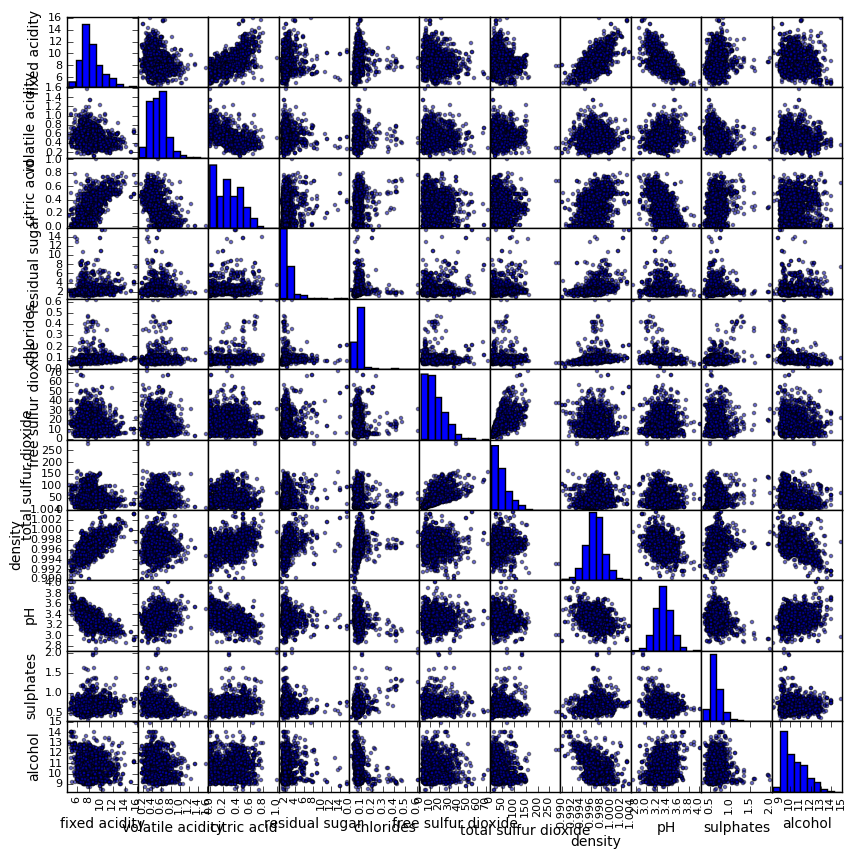

In [9]:
# 散布図行列
plotting.scatter_matrix(df[list(df.columns[:-1])], figsize=(10, 10)) 
plt.show()

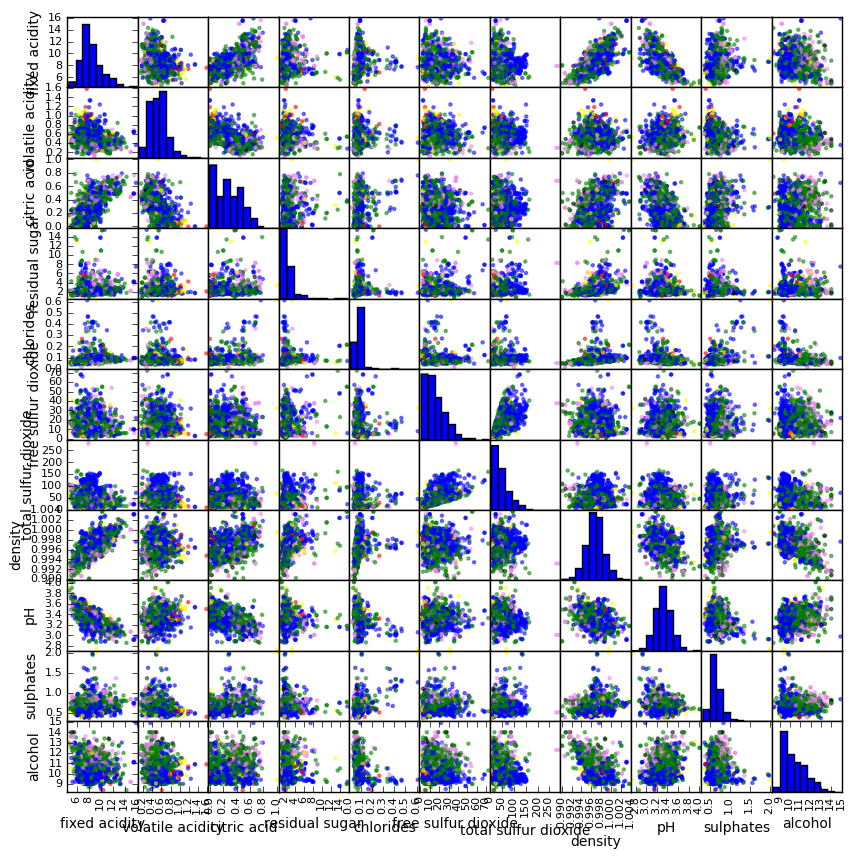

In [10]:
# 色分けした散布図行列
color_codes = ["#FF0000", "#FFFF00", "#0000FF","#008000","#EE82EE","#000000"]
class_names = list(set(df.iloc[:, -1]))
colors = [color_codes[class_names.index(x)] for x in list(df.iloc[:, -1])]
plotting.scatter_matrix(df[list(df.columns[:11])], figsize=(10, 10), color=colors) 
plt.show()

In [55]:
# 行列の正規化
dfs = df.iloc[:, :11].apply(lambda x: (x-x.mean())/x.std(), axis=0).fillna(0)

In [56]:
dfs

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
5,-0.528194,0.738187,-1.391037,-0.524002,-0.264878,-0.274845,-0.196617,0.558100,1.288240,-0.579025,-0.959946
6,-0.241019,0.403103,-1.083031,-0.665853,-0.392360,-0.083643,0.380972,-0.183687,-0.071983,-1.168972,-0.959946
7,-0.585629,0.682339,-1.391037,-0.949556,-0.477348,-0.083643,-0.774207,-1.137414,0.510970,-1.109977,-0.396918
8,-0.298454,0.291408,-1.288368,-0.382151,-0.307372,-0.657248,-0.865405,0.028252,0.316652,-0.520031,-0.866108
9,-0.470759,-0.155370,0.457001,2.525799,-0.349866,0.107558,1.688149,0.558100,0.251880,0.836846,0.072271


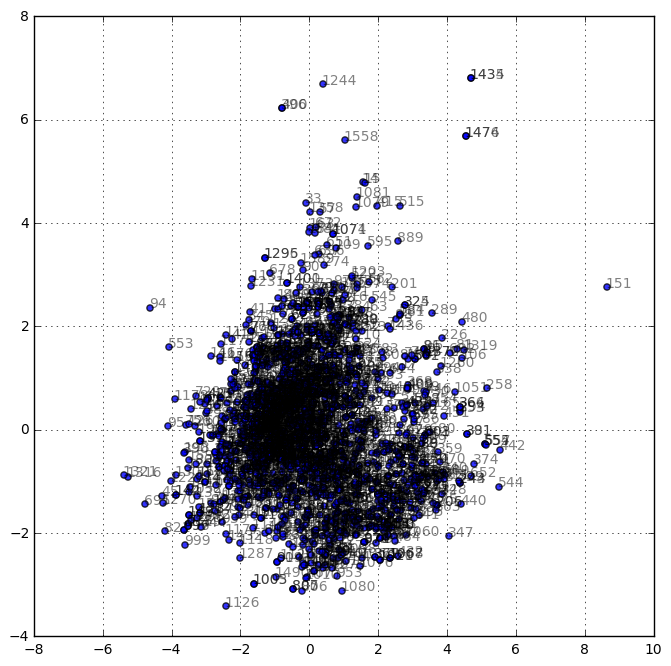

In [57]:
#主成分分析の実行
pca = PCA()
pca.fit(dfs.iloc[:, :])
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(dfs.iloc[:, :])
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(8, 8))
for x, y, name in zip(feature[:, 0], feature[:, 1], dfs.index):
    plt.text(x, y, name, alpha=0.5, size=10)
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8)
plt.grid()
plt.show()

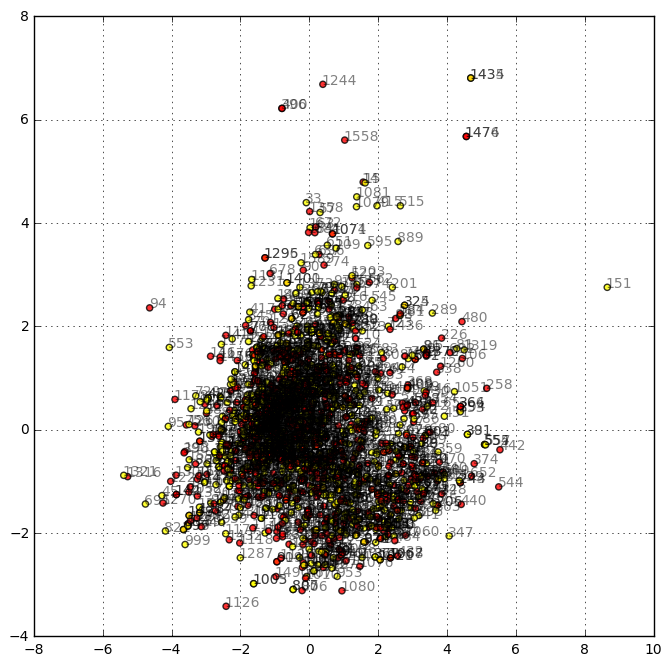

In [58]:
#主成分分析の実行
pca = PCA()
pca.fit(dfs.iloc[:, :])
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(dfs.iloc[:, :])
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(8, 8))
for x, y, name in zip(feature[:, 0], feature[:, 1], dfs.index):
    plt.text(x, y, name, alpha=0.5, size=10)
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=colors)
plt.grid()
plt.show()

In [75]:
feature_names = df.columns[:-1]
target_names = list(set(df.iloc[:, -1]))
sample_names = df.index
data = dfs.iloc[:, :11]
target = df.iloc[:, 11]

In [61]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
5,-0.528194,0.738187,-1.391037,-0.524002,-0.264878,-0.274845,-0.196617,0.558100,1.288240,-0.579025,-0.959946
6,-0.241019,0.403103,-1.083031,-0.665853,-0.392360,-0.083643,0.380972,-0.183687,-0.071983,-1.168972,-0.959946
7,-0.585629,0.682339,-1.391037,-0.949556,-0.477348,-0.083643,-0.774207,-1.137414,0.510970,-1.109977,-0.396918
8,-0.298454,0.291408,-1.288368,-0.382151,-0.307372,-0.657248,-0.865405,0.028252,0.316652,-0.520031,-0.866108
9,-0.470759,-0.155370,0.457001,2.525799,-0.349866,0.107558,1.688149,0.558100,0.251880,0.836846,0.072271


In [78]:
pd.DataFrame(target)

,quality
0,5
1,5
2,5
3,6
4,5
5,5
6,5
7,7
8,7
9,5


In [63]:
from sklearn import cross_validation as cv
train_data, test_data, train_target, test_target = cv.train_test_split(data, target, test_size=0.5)

In [64]:
train_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1032,-0.126149,1.631743,-1.391037,1.107287,0.160064,-1.039652,-0.987003,0.950187,0.316652,-0.756009,-0.772270
305,1.137423,0.012172,1.073014,-0.027523,-0.519842,-0.944051,-0.652609,1.617796,-1.237888,-0.402042,-1.053784
481,0.620507,-1.272316,1.483689,0.185254,-0.158642,-0.944051,-0.895805,-0.183687,-1.043571,1.544781,1.198326
1143,-0.757935,-1.719094,0.148995,-0.524002,-0.477348,0.011958,-0.804607,-0.014136,1.935965,0.954835,-0.396918
1016,0.333332,-0.825538,0.662339,-0.240300,-0.413607,-0.370446,-0.561411,-0.999653,-0.266301,0.541872,2.042867
1208,-0.643065,-0.937232,0.970345,-0.311225,-0.286125,0.776764,-0.075020,-0.745326,0.575742,1.131819,0.541460
1450,-0.643065,-0.881385,0.251664,-0.382151,-0.541090,-0.083643,-0.561411,-1.084429,-0.525391,0.423883,0.822974
1191,-1.045110,1.994751,-1.391037,-0.169374,1.668606,-0.944051,-1.047802,-0.655252,1.612102,-0.873998,0.353785
1285,1.711774,-0.881385,1.175683,-0.524002,0.053829,0.394361,0.016179,0.314370,-1.043571,-0.520031,0.072271
673,-0.068714,1.129118,-0.313015,-0.594928,-0.286125,-1.039652,-1.017403,0.028252,-0.719708,-0.815004,-0.866108


In [65]:
train_target

1032    5
305     6
481     8
1143    6
1016    7
1208    7
1450    7
1191    5
1285    5
673     5
1560    5
169     5
901     7
1223    6
1313    6
1039    6
1498    6
336     6
954     6
974     7
1588    6
299     5
1171    6
706     5
919     6
903     7
1282    6
648     7
1347    5
1153    6
       ..
1362    6
1047    5
320     7
943     7
257     5
853     6
1586    6
334     7
407     7
936     6
1201    7
1400    5
718     5
1503    6
1092    6
1203    5
1049    6
802     7
41      4
1184    5
932     6
160     5
681     6
426     6
1403    8
425     7
1058    7
917     6
691     5
809     6
Name: quality, dtype: int64

In [68]:
# 様々なパラメータ（ハイパーパラメータという）で学習し、分離性能の最も良いモデルを選択する。
parameters = [
    {'kernel': ['linear'], 'C': [1, 10]},
    {'kernel': ['rbf'],     'C': [1, 10], 'gamma': [1e-2, 1e-3]},      
    {'kernel': ['poly'],'C': [1, 10], 'degree': [2, 3]}]

In [66]:
# 様々なパラメータ（ハイパーパラメータという）で学習し、分離性能の最も良いモデルを選択する。
parameters = [
    {'kernel': ['linear'], 'C': [1]},
    {'kernel': ['rbf'],     'C': [1], 'gamma': [1e-2]},      
    {'kernel': ['poly'],'C': [1], 'degree': [2]}]

In [69]:
!date
from sklearn import svm
from sklearn.metrics import accuracy_score
import time
start = time.time()
from sklearn import grid_search

# train_data を使って、SVM による学習を行う
gs = grid_search.GridSearchCV(svm.SVC(), parameters, n_jobs=2).fit(train_data, train_target)

# 分離性能の最も良かったモデルが何だったか出力する
print(gs.best_estimator_)

# モデル構築に使わなかったデータを用いて、予測性能を評価する
pred_target = gs.predict(test_data)
print ("Accuracy_score:{0}".format(accuracy_score(test_target, pred_target)))
elapsed_time = time.time() - start
print("elapsed_time:{0}".format(elapsed_time))
!date

2017年 4月20日 木曜日 10時59分34秒 JST
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.01,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Accuracy_score:0.62125
elapsed_time:0.6242189407348633
2017年 4月20日 木曜日 10時59分35秒 JST


In [70]:
# 予測結果と、本当の答えを比較する
df = pd.DataFrame(columns=['test', 'pred'])
df['test'] = test_target # 本当の答え
df['pred'] = pred_target # 予測された答え
df.T

,362,427,464,750,631,1061,743,156,899,58,...,127,1554,754,229,726,273,1027,1395,1485,1565
test,5,6,6,5,5,8,5,5,3,5,...,5,6,6,5,6,5,5,6,5,6
pred,5,5,6,5,6,7,5,5,5,5,...,5,6,5,6,6,5,6,5,5,6


In [71]:
# 予測結果を本当の答えの比較を、混合行列（confusion matrix）で表現する
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_target, pred_target)
pd.DataFrame(cm)

,0,1,2,3,4,5
0,0,0,4,0,0,0
1,0,0,16,9,1,0
2,0,0,273,77,2,0
3,0,0,108,202,12,0
4,0,0,4,60,22,0
5,0,0,0,7,3,0


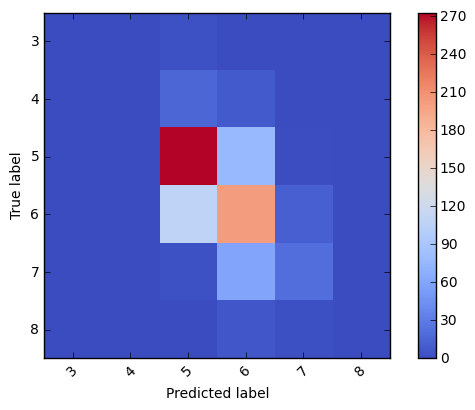

In [76]:
# 混合行列（confusion matrix）をカラーマップで見やすくする
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.coolwarm)
plt.colorbar()
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

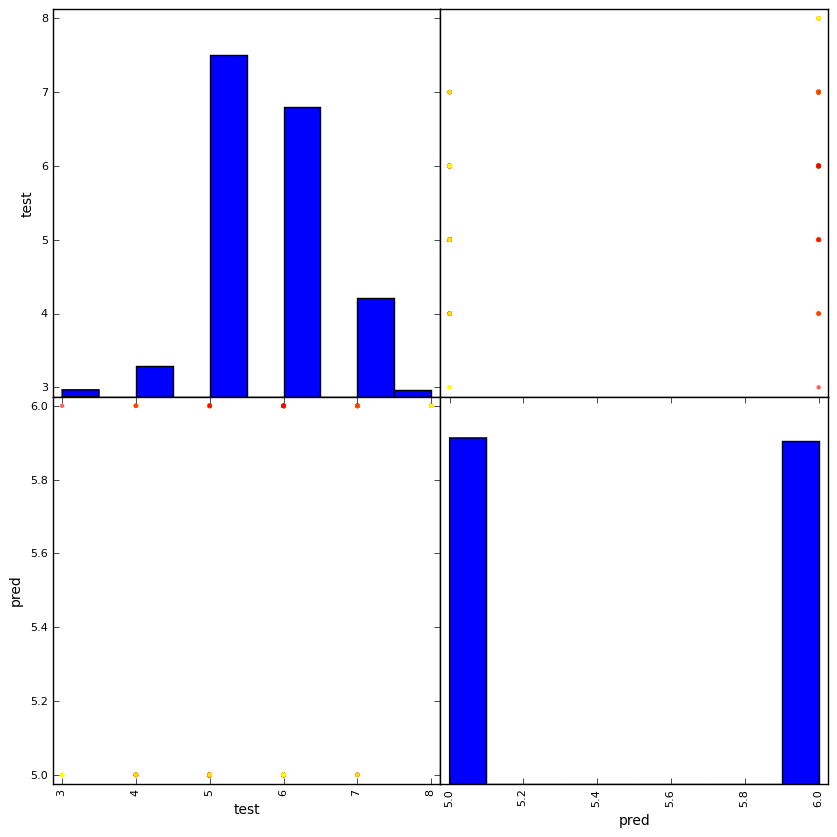

In [28]:
# 色分けした散布図行列
color_codes = ["#FF0000", "#FFFF00", "#0000FF","#008000","#EE82EE","#000000"]
class_names = list(set(df))
colors = [color_codes[class_names.index(x)] for x in list(df)]
plotting.scatter_matrix(df[list(df.columns[:6])], figsize=(10, 10), color=colors) 
plt.show()